## **Formalising draft work on hedge combination strategies**

If we can effectively retrieve realtime data to allow stop loss timing, you can create a profitable bet on volatility in either direction, provided you have (1) sufficient variation from the price of the first bet, (2) an effective implementation of stop loss, and (3) all bets being matched.

### 1. Payout functions

To create an option-like payout graph, we first need payout functions fixing all variables but the price at which the second bet is taken. 
These functions are defined *given* the optimal stake of the second bet and are found by substituting ls* or bs* into the win side/loss side payout functions.

In [56]:
def payout_back_to_lay(bp, bs, lp, c):
    return - bs + (((bp - 1) * bs * (1 - c) + bs) * (1 - c)) / (lp - c)

def payout_lay_to_back(bp, lp, ls, c):
    return (- ls * (lp - c))/(bp * (1 - c) + c) + ls * (1 - c) 

These functions when graphed show the payouts for each hedge strategy as the price of the second half of the bet changes:

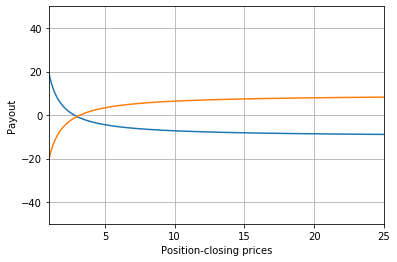

In [57]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#Set your prices, stakes and c for first bet for the example plot. Ls/bs is optimal, lp/bp is the second bet price, which is allowed to vary.
lp = np.arange(1.0, 25.0, 0.01)
payout_b_t_l = payout_back_to_lay(3, 10, lp, 0.05) 
bp = np.arange(1.0, 25.0, 0.01)
payout_l_t_b = payout_lay_to_back(bp, 3, 10, 0.05)

fig, ax = plt.subplots()
ax.plot(lp, payout_b_t_l)
ax.plot(bp, payout_l_t_b)
ax.set_ylim([-50,50])
ax.set_xlim([1.01,25]) #minimum price is 1.01
ax.set(xlabel='Position-closing prices', ylabel='Payout')
ax.grid()

plt.show()

This graph shows that technically: 
* a back_to_lay hedge has profit -> (bp - 1) * bs * (1 -c) as lp -> 1.00, and limited loss -> -bs as lp -> infinity
* a lay_to_back hedge has loss -> - ls * (lp - 1) as bp -> 1.01, and limited profit -> ls (1 - c) as bp -> infinity.

It is interesting to note the rate of change in the payout (looking at the profitable side only) as the price departs from that of the original position. 

### 2. Combination strategies

The aim of a combination strategy is to restrict the above bets so that only the portion of the payout above 0 remains on either side.

Suppose you combine each strategy as is. Your strategy is unprofitable, since the lay-to-back hedge is always marginally less profitable at all prices due to commission:

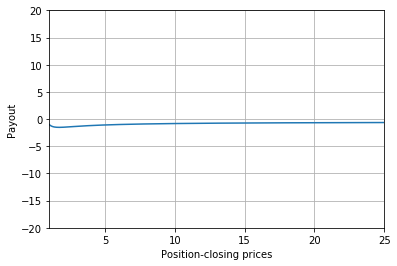

In [58]:
p = np.arange(1.0, 25.0, 0.01)
payout_combined = payout_back_to_lay(3, 10, p, 0.05) + payout_lay_to_back(p, 3, 10, 0.05)

fig, ax = plt.subplots()
ax.plot(p, payout_combined)
ax.set_ylim([-20,20])
ax.set_xlim([1.01,25])
ax.set(xlabel='Position-closing prices', ylabel='Payout')
ax.grid()

plt.show()

We want a strategy where we have as much of the profitable parts of both hedge positions, while having a payoff graph that is a line with no breaks. This will mean that all possible scenarios are covered. 

The simplest option is to place stop loss bets at the price where the two payoff functions are equal

In [71]:
def payoff_btl_equal_ltb(bs, ls, c): #valid for when bs * c - bs + ls != 0
    return c * (bs + ls) / (bs * c - bs + ls)

print(payoff_btl_equal_ltb(10, 10, 0.05))

2.0


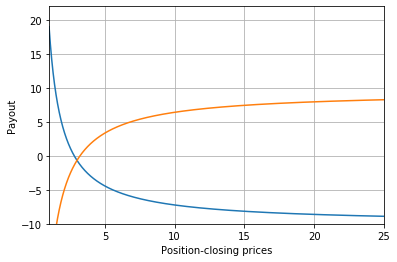

In [89]:
p_stop_loss = payoff_btl_equal_ltb(10, 10, 0.05)
p = np.arange(1.0, 25.0, 0.01)
payout_b_t_l = payout_back_to_lay(3, 10, p, 0.05)
payout_l_t_b = payout_lay_to_back(p, 3, 10, 0.05)

fig, ax = plt.subplots()
ax.plot(p, payout_b_t_l)
ax.plot(p, payout_l_t_b)
ax.set_ylim([-10,22])
ax.set_xlim([1.01,25])
ax.set(xlabel='Position-closing prices', ylabel='Payout')
ax.grid()

plt.show()